## Analysis notebook

This is a generic analysis notebook that can be used to plot the different figures in the DeepGreen paper. Plots are shown for each of the different figure types using the examples in the paper. In general, load an experiment with the Experiment class, then provide the experiment to the different plotting functions. The plotting functions use the matplotlib pyplot interface to generate figures.

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt

from Experiment import Experiment
from figure_functions import compute_rolling_average, prediction_compare_plot, latent_space_plot, loss_boxplot
from figure_functions import training_loss_epochs_plot, waterfall_plot, generate_GL_plot, generate_G_plot, summary_boxplot
from figure_functions import get_plot_options

full_params, half_params = get_plot_options()

In [2]:
# How to load up the different experiments for analysis
s0 = Experiment(experiment_name="Sys0-Paper-Experiment", data_file_prefix='S0-Oscillator')
s1 = Experiment(experiment_name="Sys1-Paper-Experiment", data_file_prefix='S1-NLSL1')
s2 = Experiment(experiment_name="Sys2-Paper-Experiment", data_file_prefix='S2-NLSL2')

# In general we'll use the "System 0" basic example system data for plotting the figure below
# although you could set s1, s2, or any other experiment here:
expt = s0

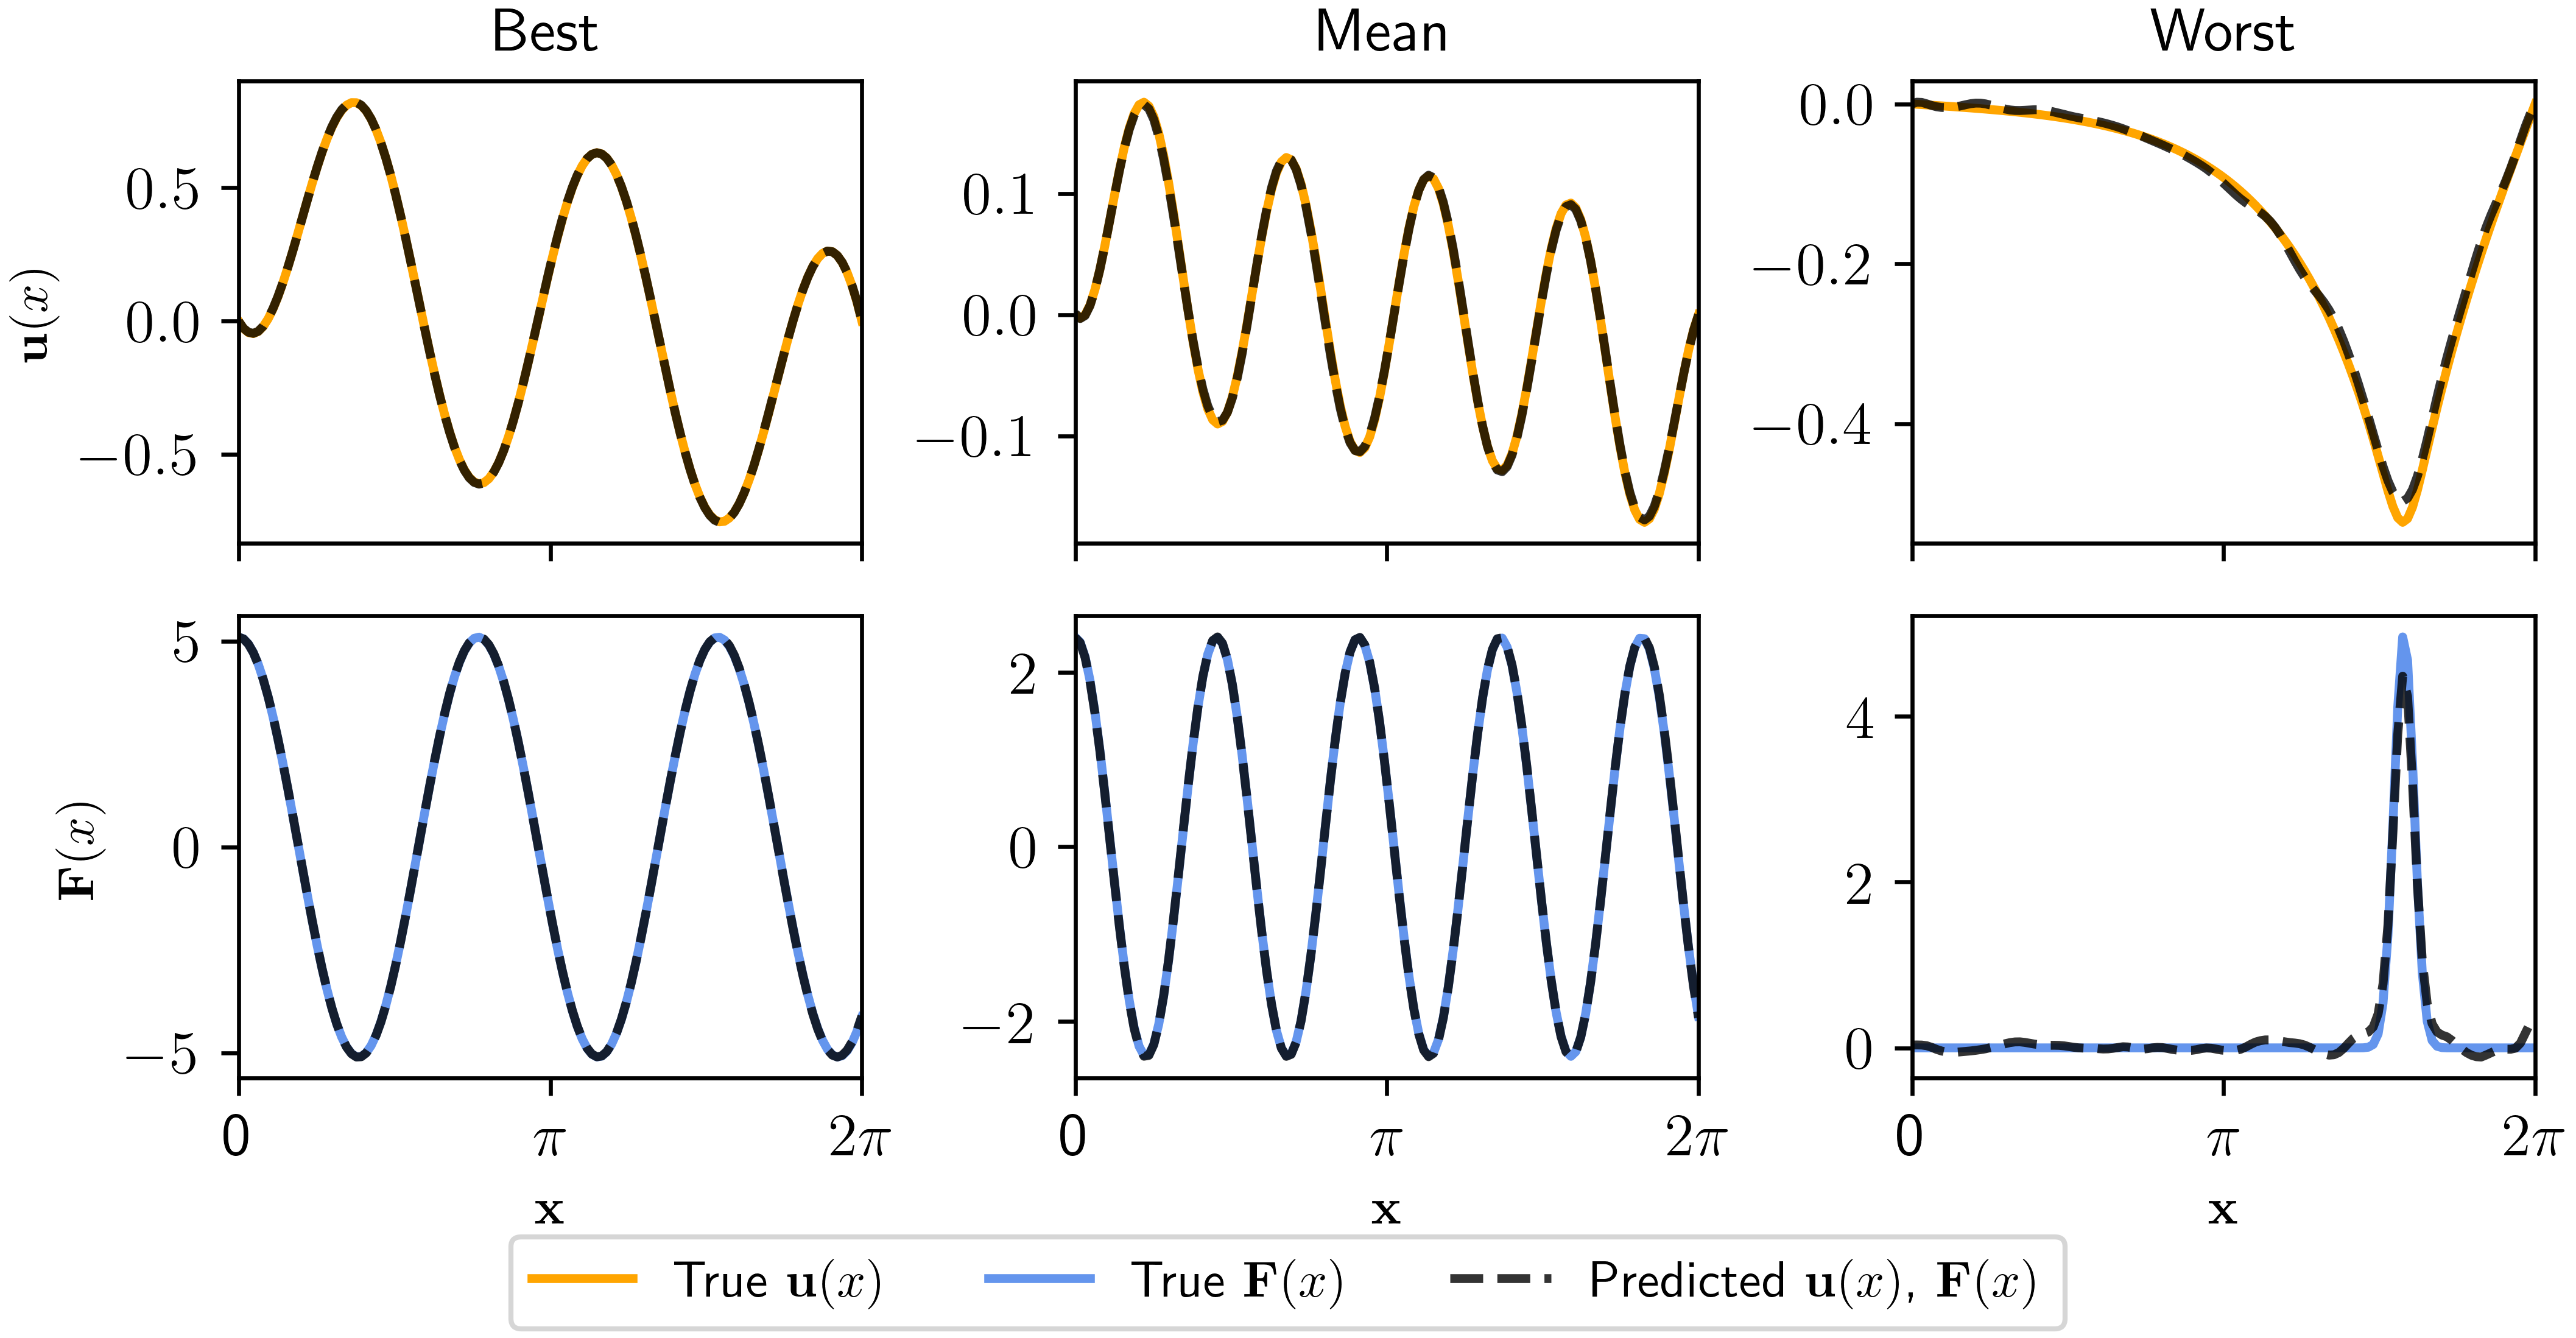

In [3]:
# Set plot options
plt.rcdefaults()
plot_params = full_params.copy()
plot_params['lines.linewidth'] = 1.75
plt.rcParams.update(plot_params)

# Plot and show prediction vs true data for test 1 (similar test data)
prediction_compare_plot(expt, "test1")
plt.show()

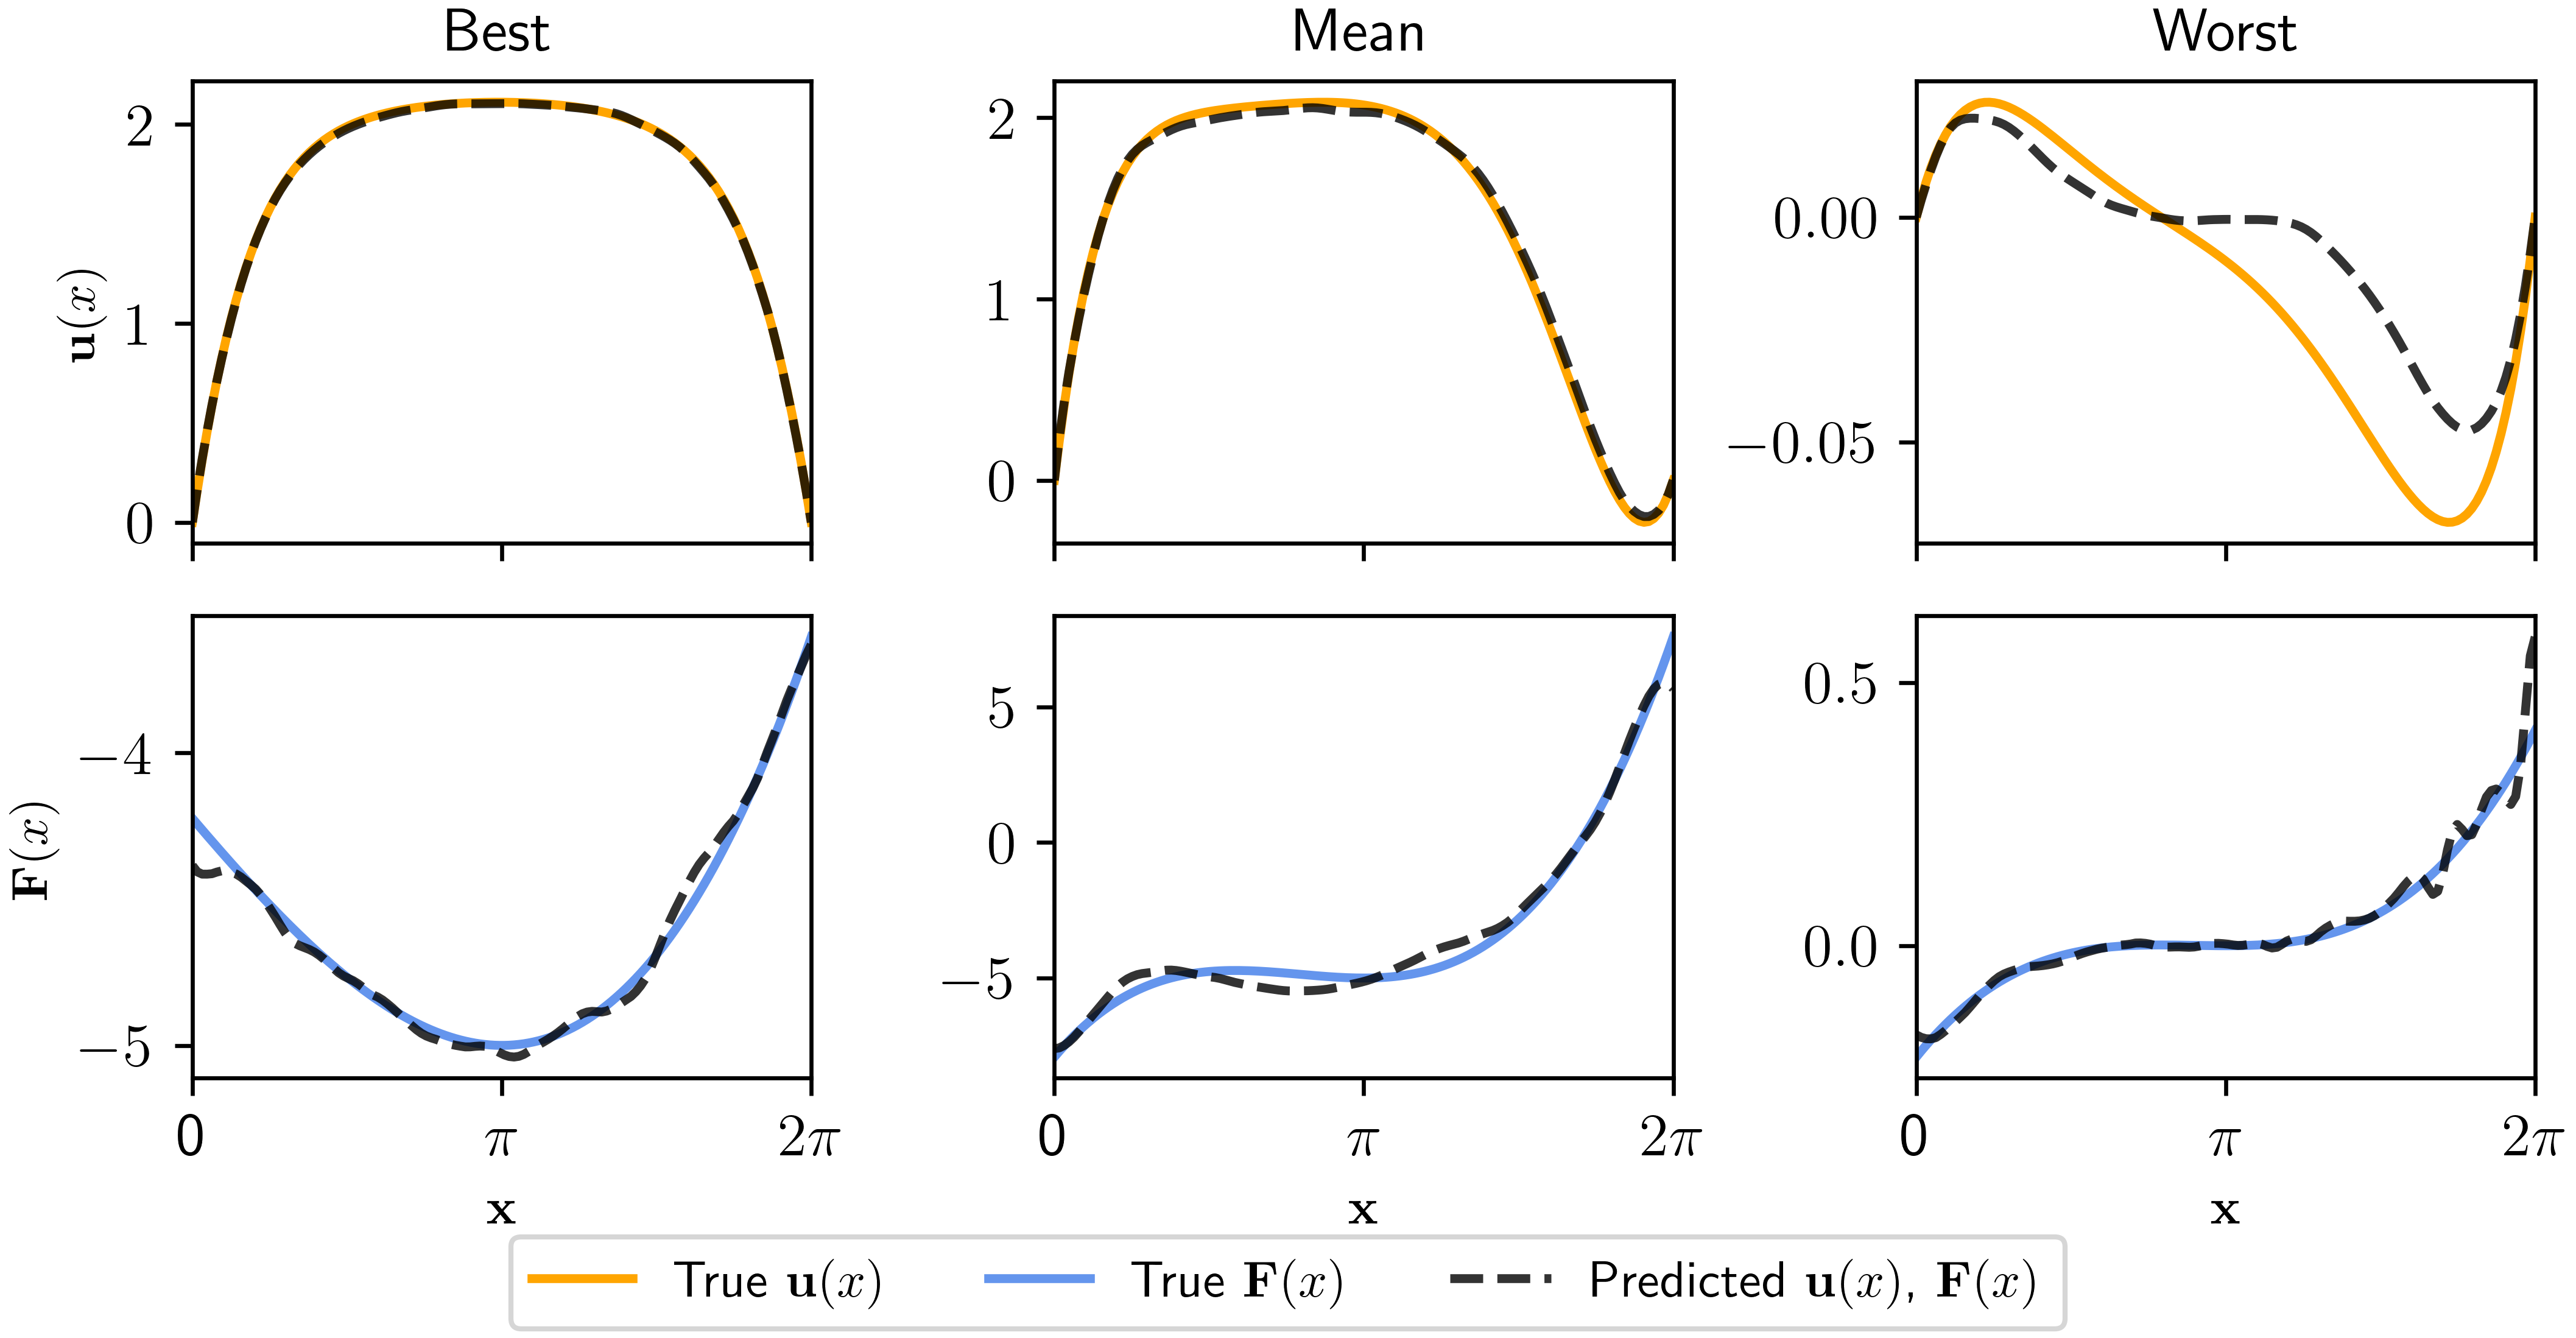

In [4]:
# Set plot options
plt.rcdefaults()
plot_params = full_params.copy()
plot_params['lines.linewidth'] = 1.75
plt.rcParams.update(plot_params)

# Plot and show prediction vs true data for test 2 (dissimilar test data)
prediction_compare_plot(expt, "test2")
plt.show()

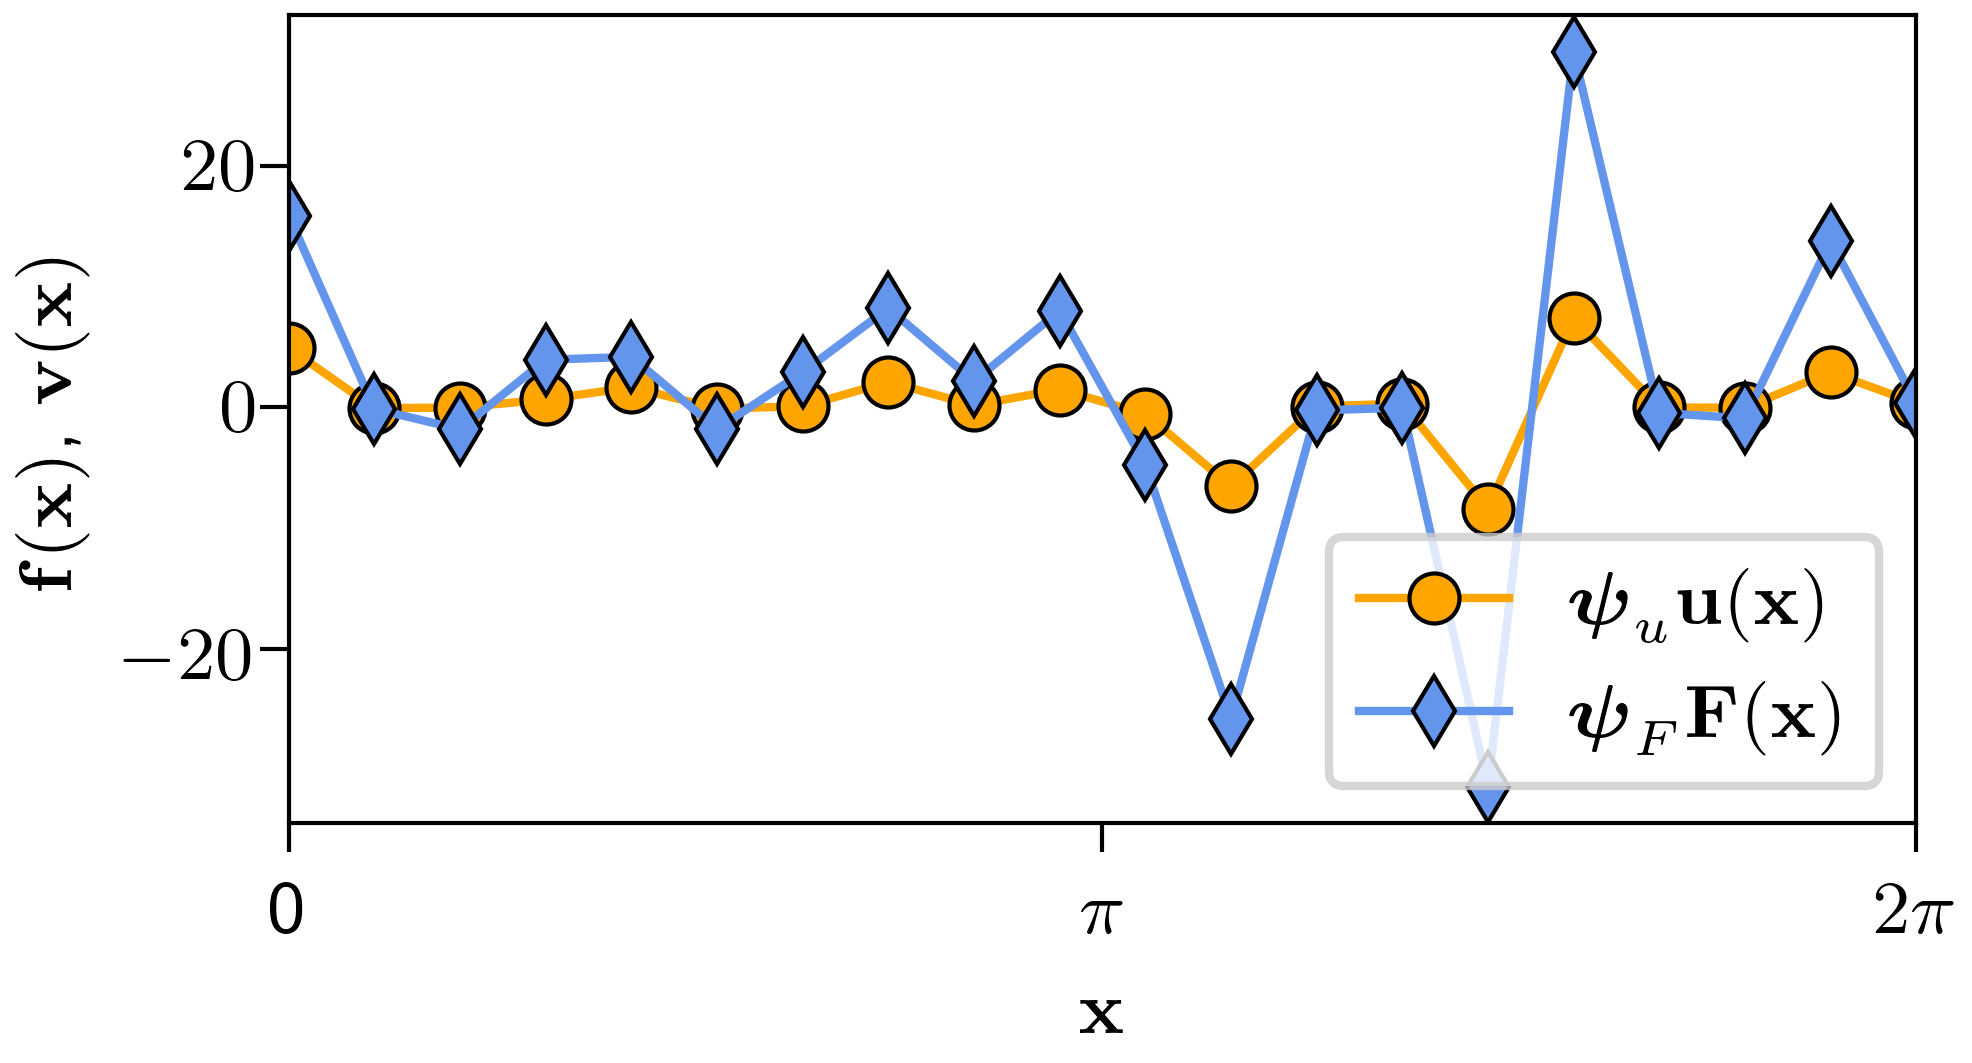

In [5]:
# Set plot options
plt.rcdefaults()
plot_params = half_params.copy()
plot_params['figure.figsize'] = (3.5,1.75)
plt.rcParams.update(plot_params)

# Plot and show the latent space vectors
latent_space_plot(expt, index=14, dataset_name='train1')
plt.show()

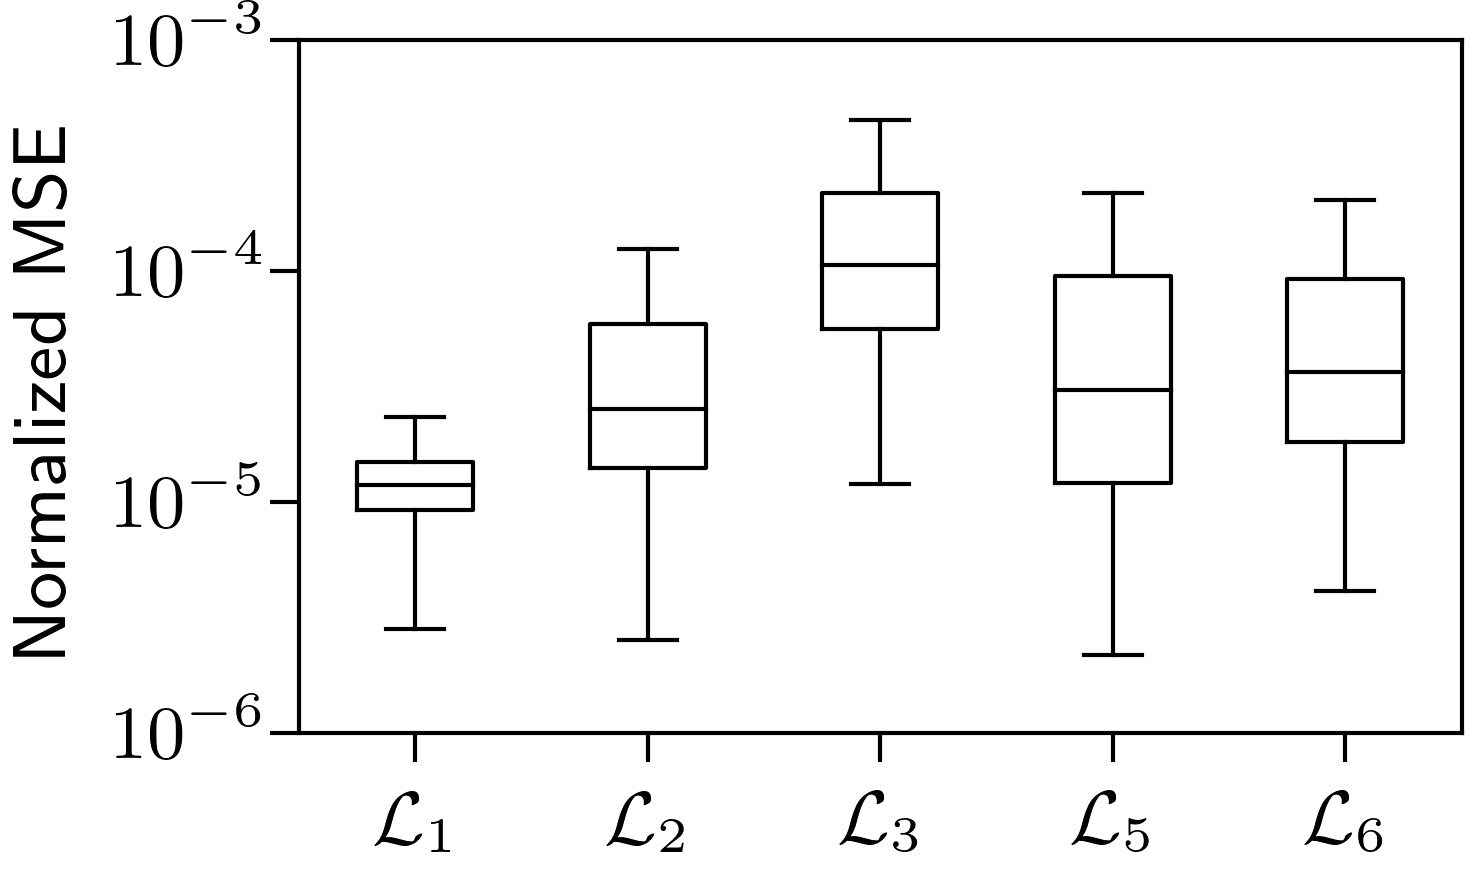

In [6]:
# Set plot options
plt.rcdefaults()
plot_params = half_params.copy()
plot_params['figure.figsize'] = (2.5, 1.5)
plt.rcParams.update(plot_params)

# Plot and show the summary boxplot:
loss_boxplot(expt, dataset_name='test1')
plt.show()

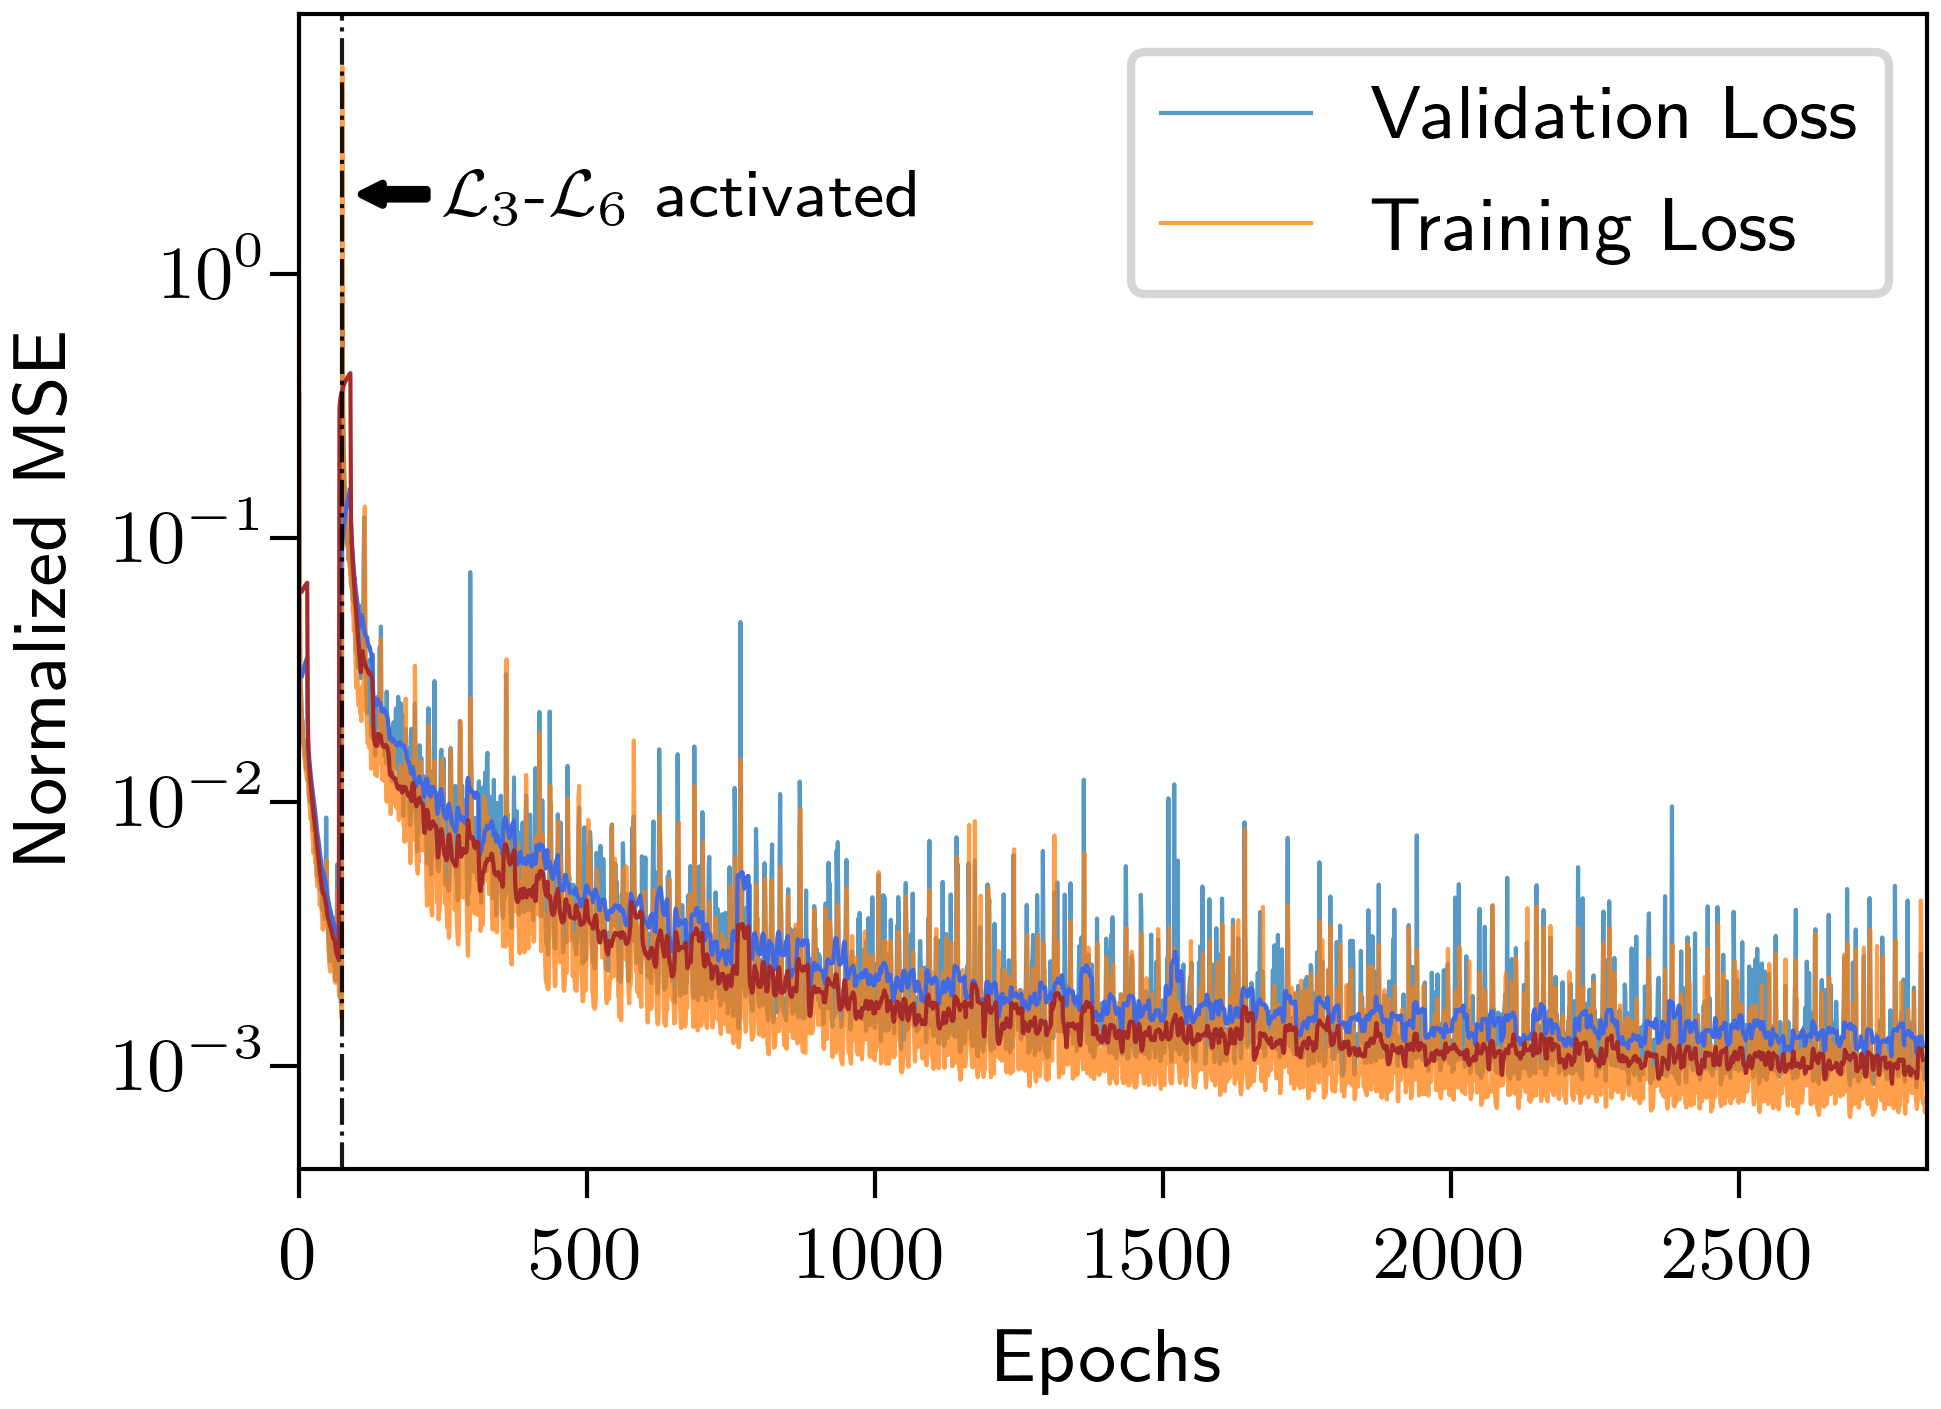

In [7]:
# Set up plotting options
plt.rcdefaults()
plot_params = half_params.copy()
plot_params['lines.linewidth'] = 0.5
plot_params['font.size'] = 8
plt.rcParams.update(plot_params)

# Plot and show the training loss
training_loss_epochs_plot(expt, roll_window=20)
plt.show()

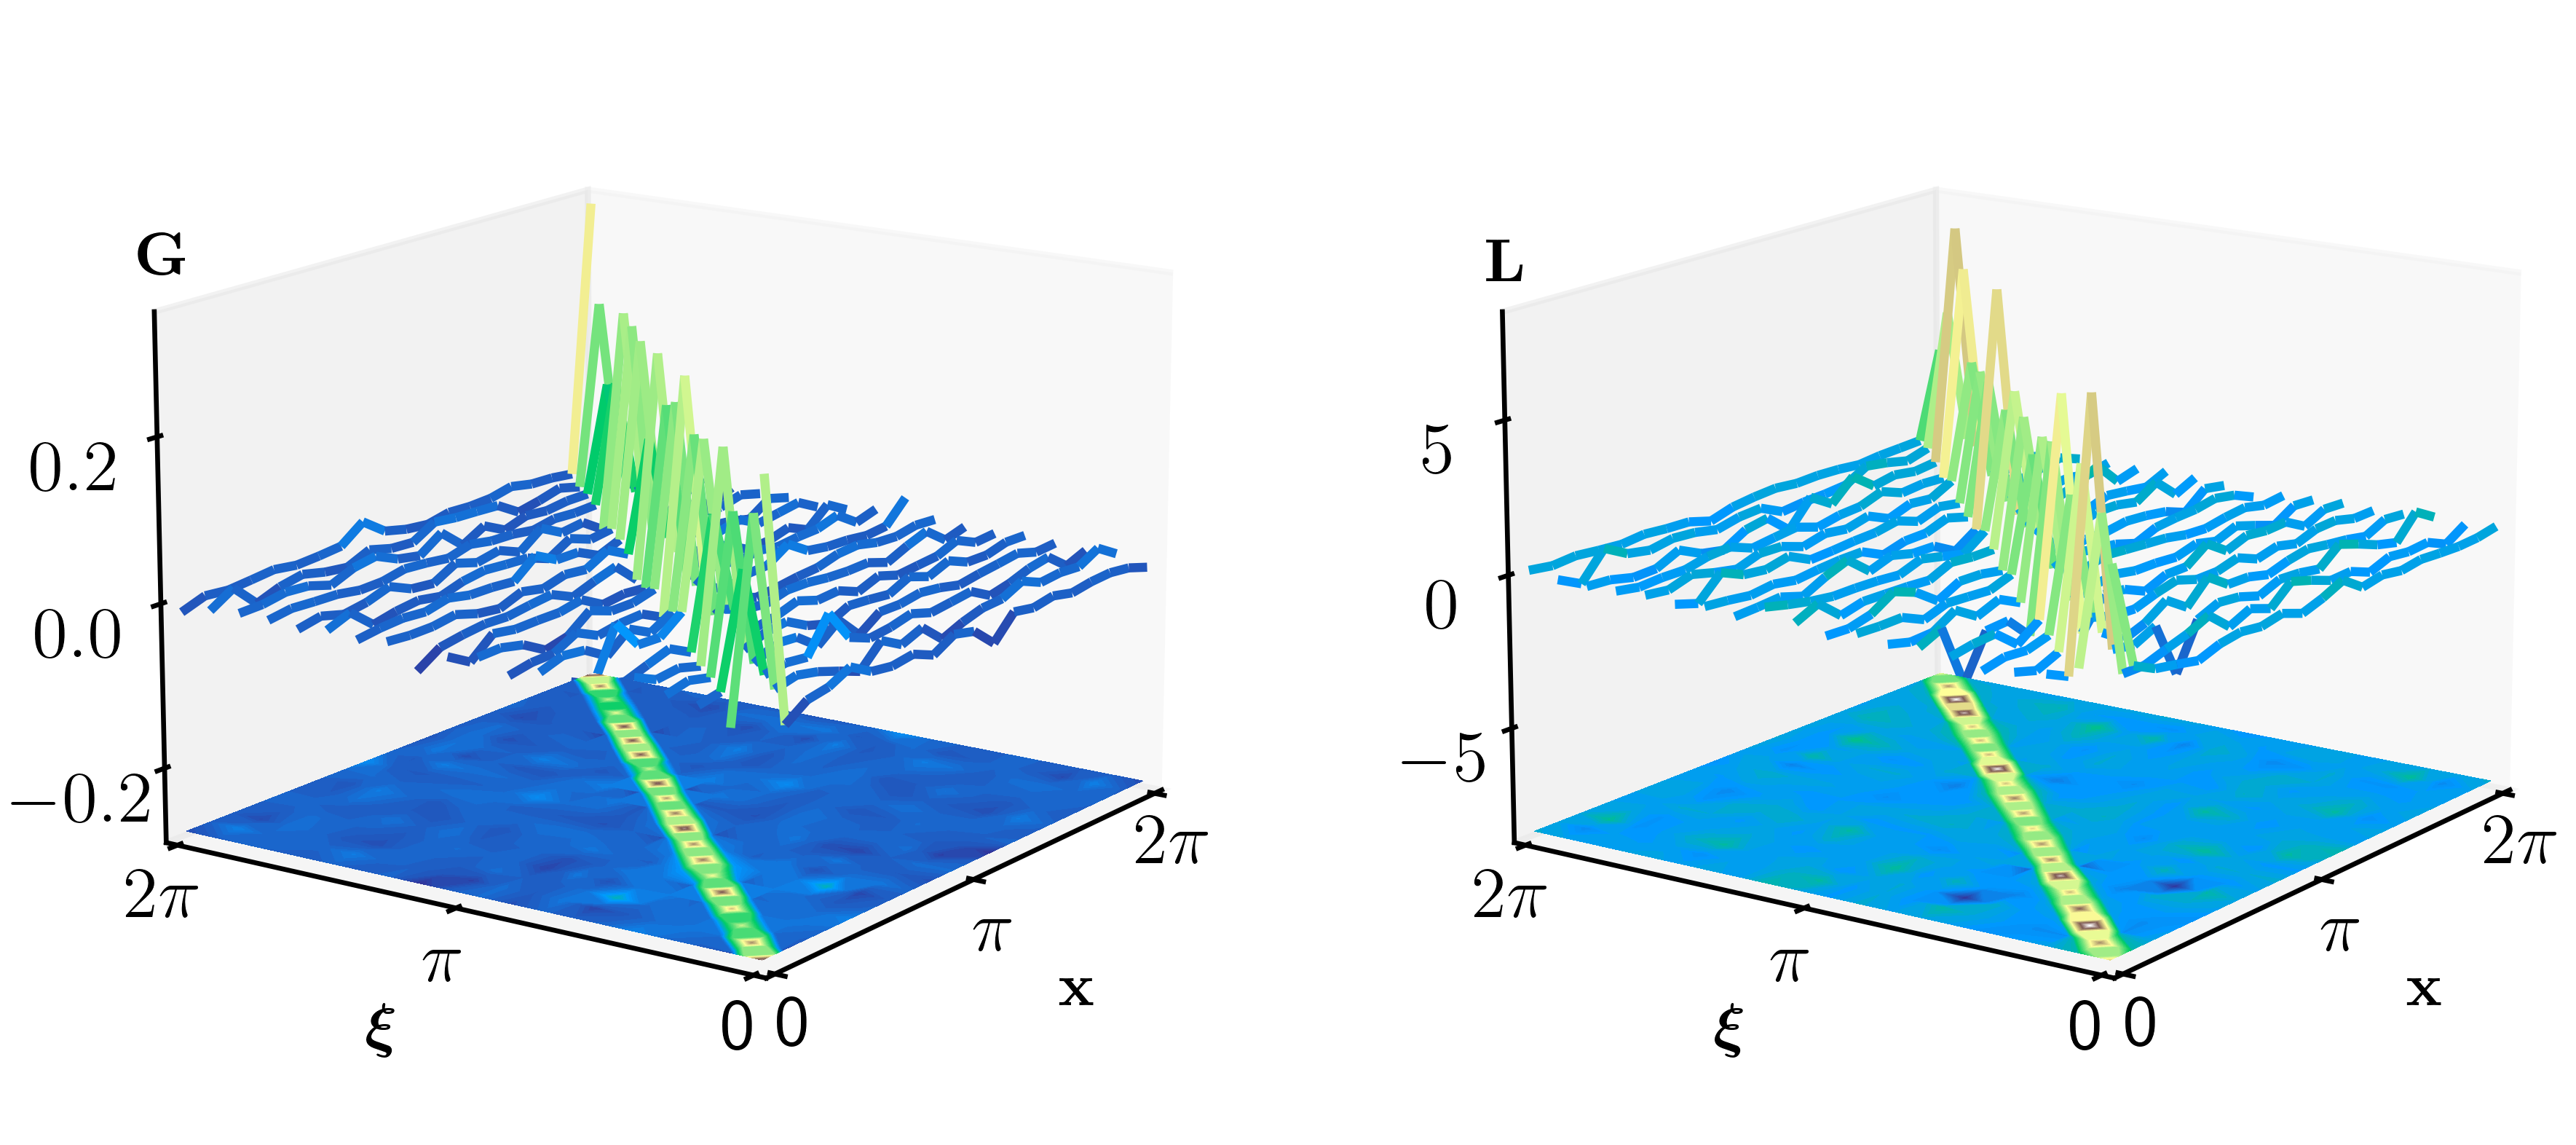

In [8]:
# Set plotting options
plt.rcdefaults()
plt.rcParams.update(full_params)

# Plot and show the Green's function and operator:
generate_GL_plot(expt)
plt.show()

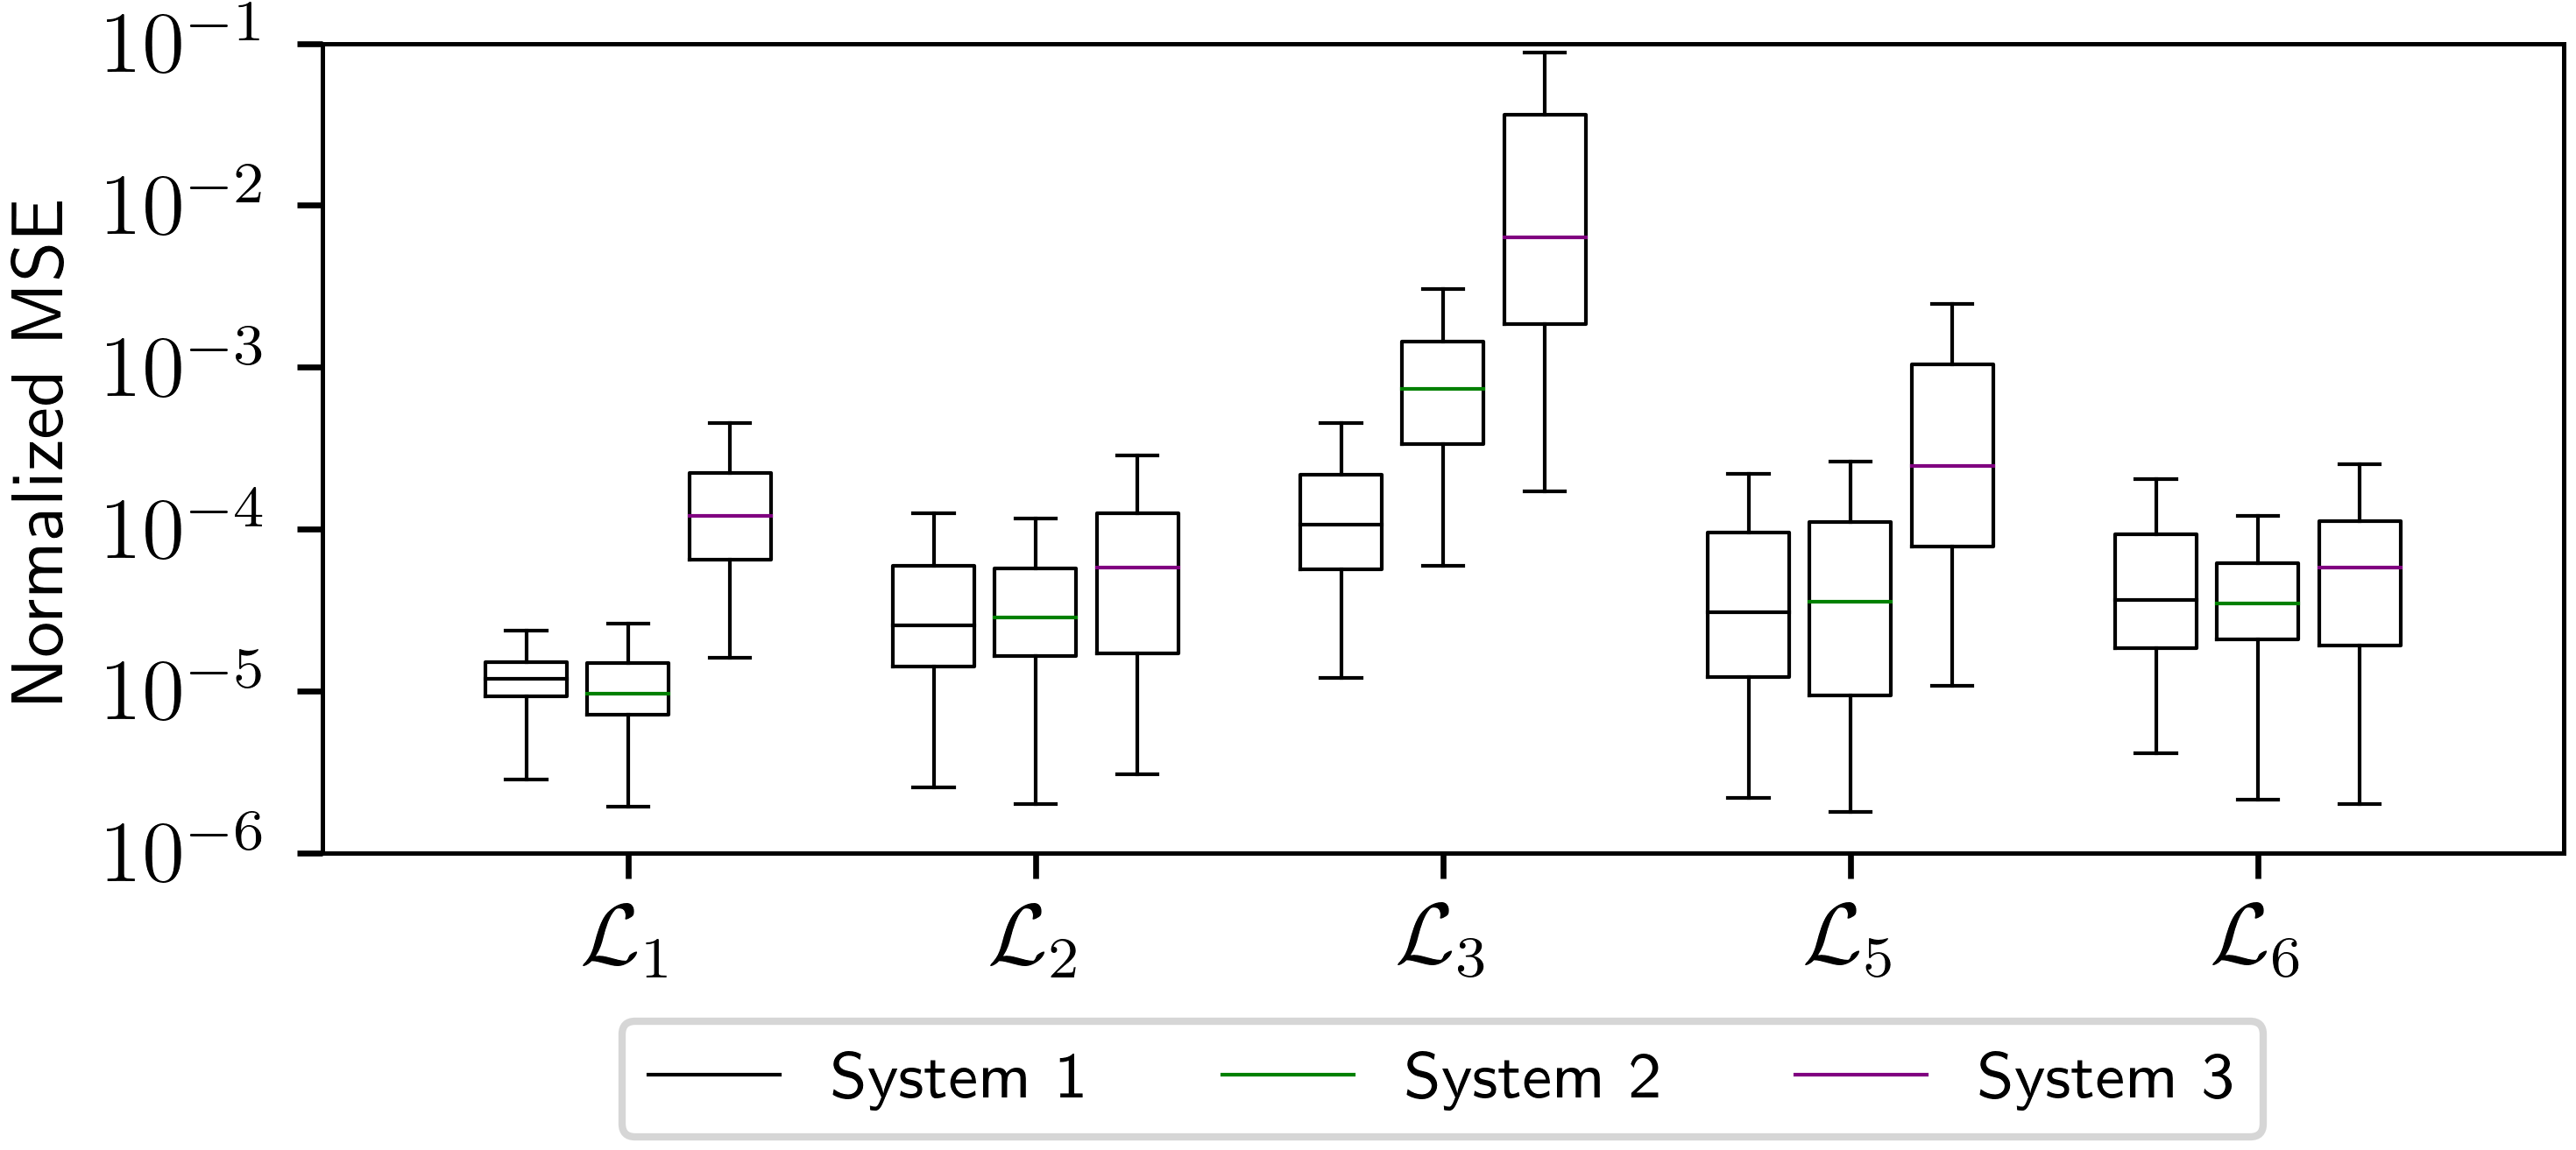

In [9]:
# Set plotting options:
plt.rcdefaults()
plot_params = full_params.copy()
plot_params['axes.linewidth'] = 0.6
plot_params['figure.figsize'] = (5.5,2)
plot_params['legend.fontsize'] = 9
plt.rcParams.update(plot_params)

# Plot and show the 3-experiment summary boxplot:
summary_boxplot(s0, s1, s2)
plt.show()

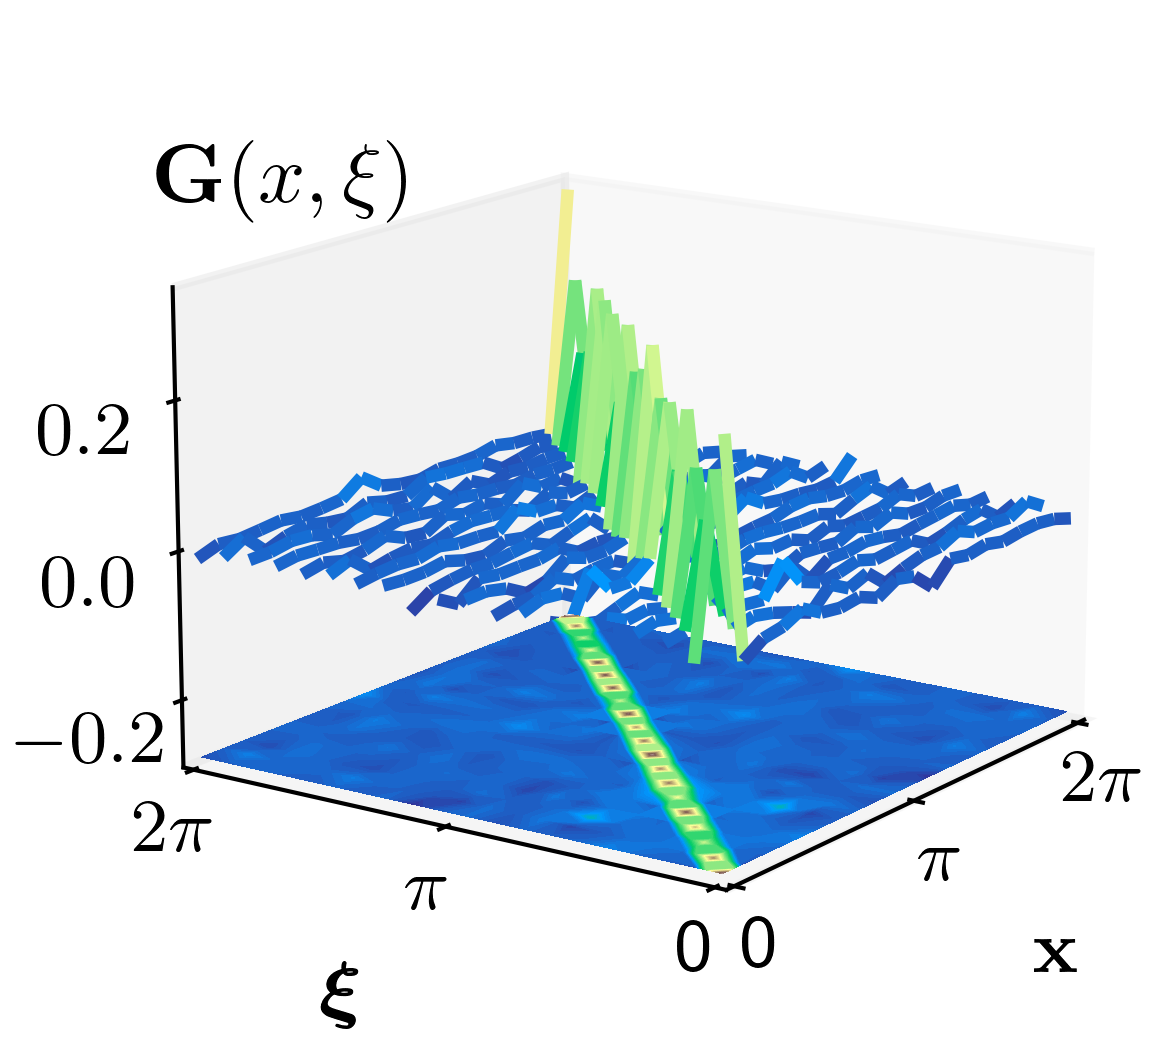

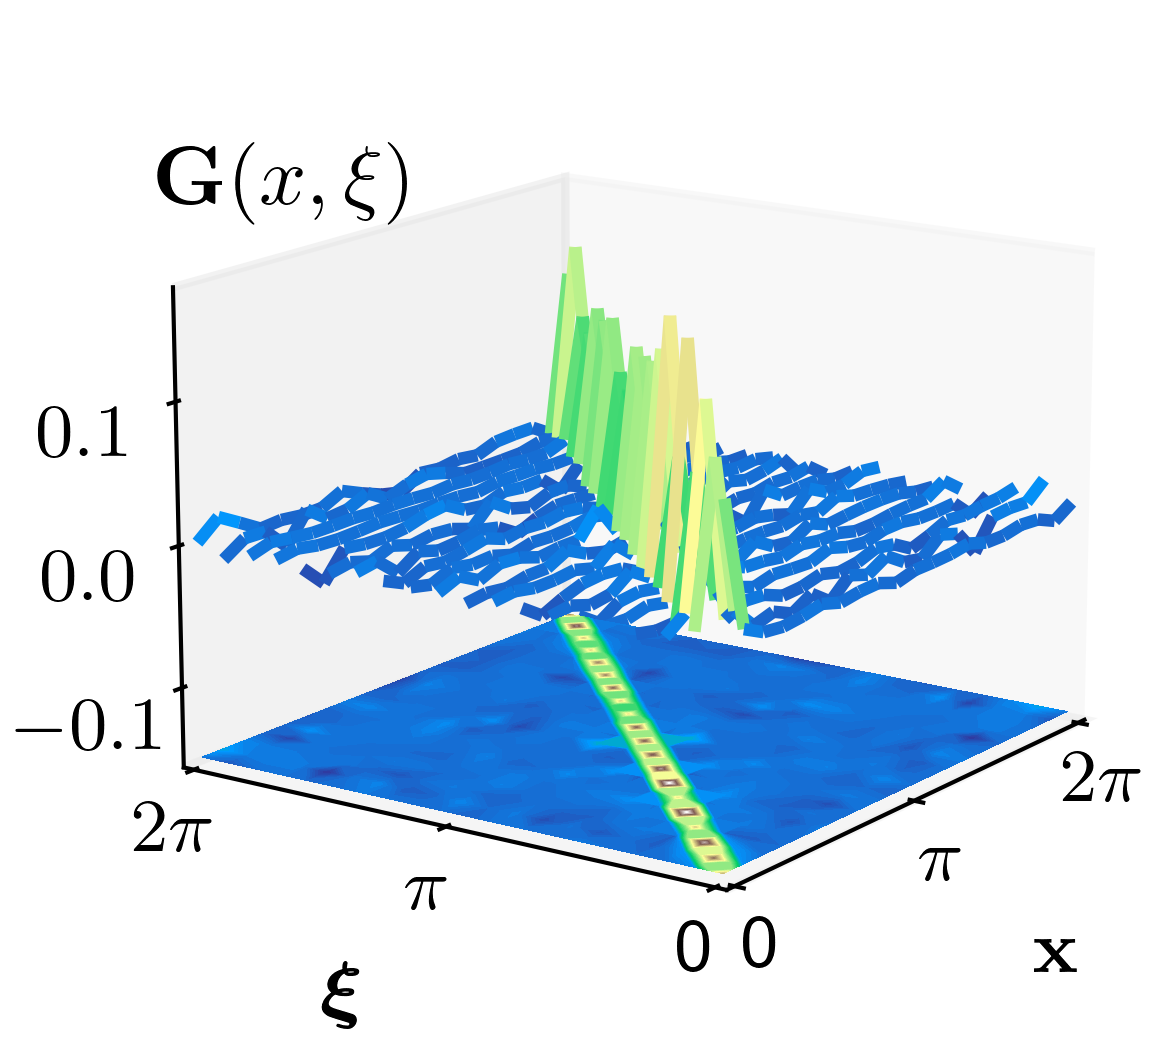

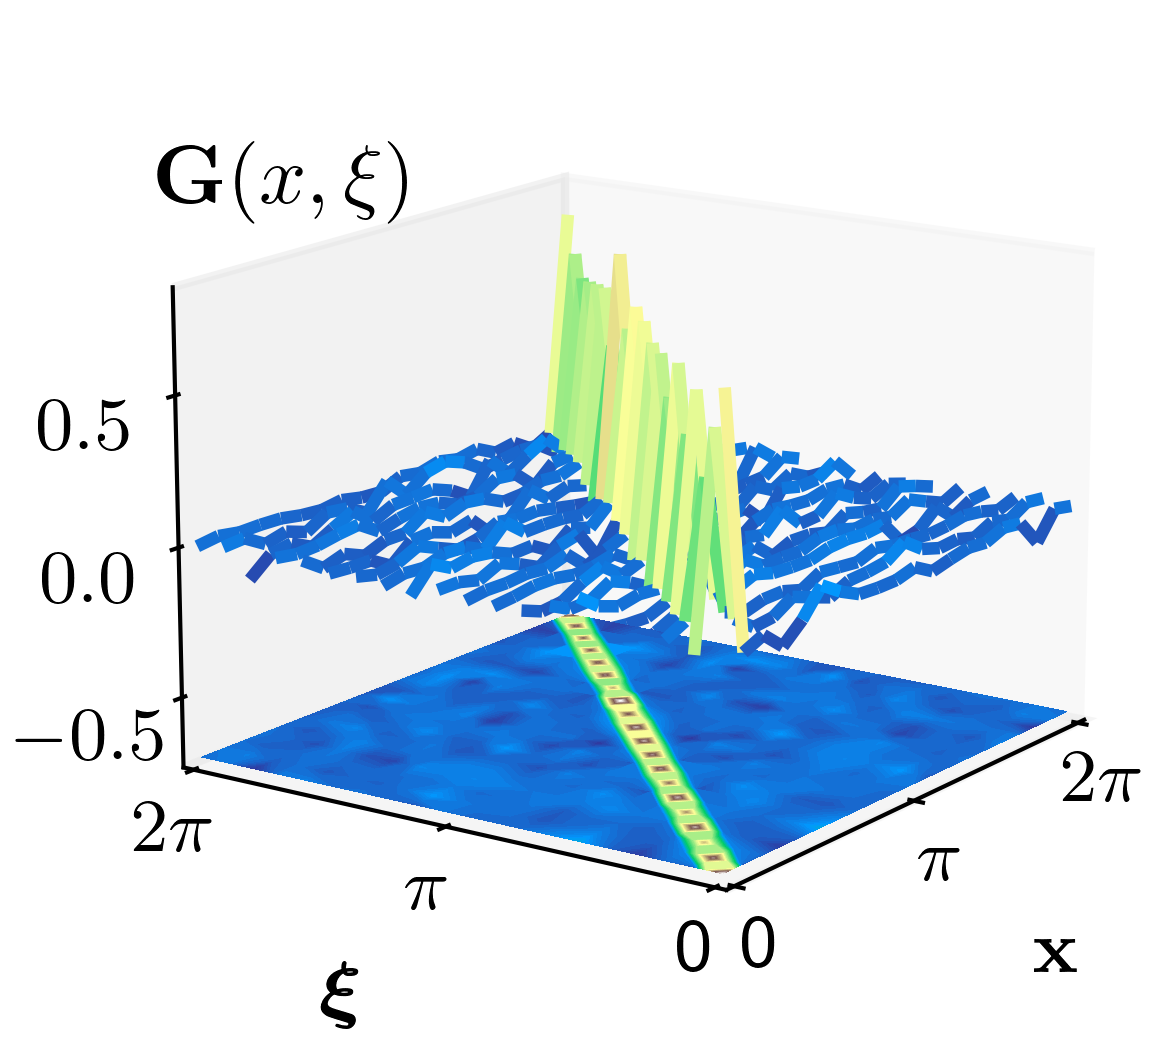

In [10]:
# Set up plotting options
plt.rcdefaults()
plot_params = half_params.copy()
plot_params['figure.figsize'] = (2.2,2.2)
plt.rcParams.update(plot_params)

# Plot and show the Green's function for each of the 3 experiments:
for expt in [s0, s1, s2]:
    generate_G_plot(expt)
    
plt.show()

In [11]:
# You can score the model against training/test sets like this:
#s0.evaluate_model('train1')
s0.evaluate_model('test1')

39/39 [==============================] - 0s 2ms/step - loss: 8.1880e-04 - output_1_loss: 6.2296e-05 - output_2_loss: 6.2254e-05 - output_3_loss: 1.5258e-04 - output_4_loss: 9.0450e-05


[0.0008188001811504364,
 6.229623249964789e-05,
 6.225447577890009e-05,
 0.00015257652557920665,
 9.044952457770705e-05]